<h2><b>Data Loader</b></h2>

In [55]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
import numpy as np

In [56]:
import os
from scipy.io import loadmat
from scipy.interpolate import interp1d
directory = '../Dataset/Chuong Duong'

all_data = {}

# Iterate over all files in the directory
for filename in os.listdir(directory):
    if filename.endswith('.mat'):
        filepath = os.path.join(directory, filename)
        # Load the .mat file and add its contents to the dictionary
        mat_data = loadmat(filepath)
        
        # Use filename (without extension) as key for the data
        key = os.path.splitext(filename)[0]
        all_data[key] = mat_data['acceleration']
        print(filepath)
        print(mat_data)

../Dataset/Chuong Duong/ChuongDuong5.mat
{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Mon Aug  5 13:22:10 2024', '__version__': '1.0', '__globals__': [], 'acceleration': array([[ 0.00000000e+00, -1.76938762e-05,  1.93218752e-05, ...,
         3.20232276e-05,  3.98200632e-05,  0.00000000e+00],
       [ 0.00000000e+00, -2.74850791e-05,  3.98295374e-05, ...,
         5.82745773e-05,  6.57308542e-05,  0.00000000e+00],
       [ 0.00000000e+00, -3.22212570e-05,  5.97583067e-05, ...,
         7.95689663e-05,  8.19141888e-05,  0.00000000e+00],
       ...,
       [ 0.00000000e+00,  9.58576323e-06,  1.43233287e-05, ...,
         3.47126009e-05,  6.43548549e-05,  0.00000000e+00],
       [ 0.00000000e+00,  1.98457594e-05,  2.23331376e-05, ...,
         3.18232324e-05,  4.55212093e-05,  0.00000000e+00],
       [ 0.00000000e+00,  2.54074286e-05,  2.37467243e-05, ...,
         1.95918117e-05,  1.24411731e-05,  0.00000000e+00]])}
../Dataset/Chuong Duong/ChuongDuong8.mat
{'__hea

In [57]:
keys_to_stack = [f'ChuongDuong{i}' for i in range(11)]
input_data = np.stack([all_data[key] for key in keys_to_stack], axis=0)
print(all_data.keys)

# Create the corresponding labels
output_labels = np.linspace(0,10,11)  # Using 0 and 1 as class labels for binary cross-entropy
labels = output_labels

input_data = input_data[:,:,:40000]
input_data.shape, output_labels.shape

<built-in method keys of dict object at 0x7f0ad6fad500>


((11, 40, 40000), (11,))

(40, 40000)


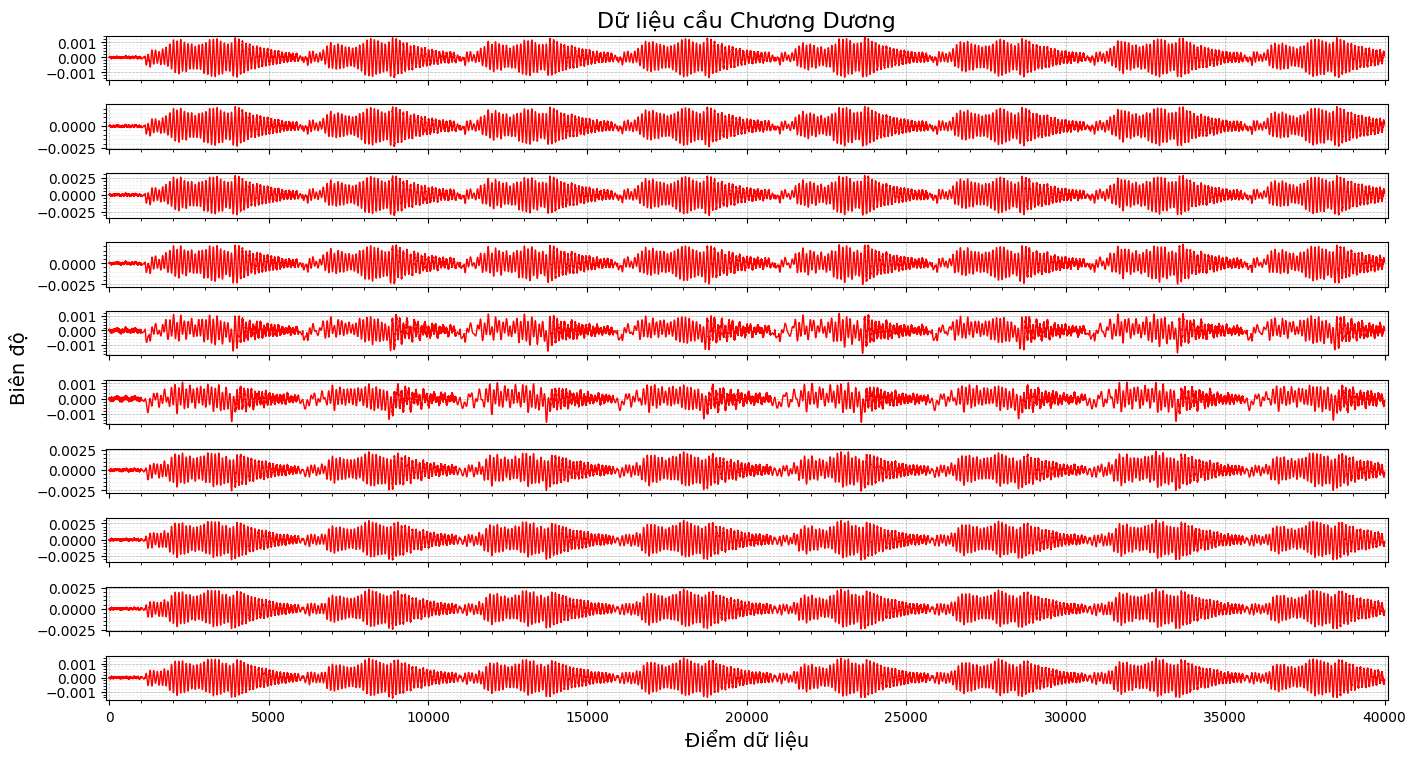

In [58]:
# Select the data at index (1, 1, :) which has a shape of (50000,)
Data = input_data[5, :, :]
print(Data.shape)
# Create the plot
fig, axes = plt.subplots(input_data.shape[1]-30, 1, figsize=(15, 8), sharex=True)


plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['font.family'] = 'sans-serif'
#print(axes)
# Plot the data for each sub-array
for i, ax in enumerate(axes):
    ax.plot(Data[i, :], linewidth=1, color = 'r')
    # ax.set_title(f'Z24 Signal Data at Index (1, {i}, :)', fontsize=12)
    
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)
    ax.minorticks_on()
    ax.grid(True, which='minor', color='#999999', linestyle='--', alpha=0.2)
    ax.set_xlim(-100, Data.shape[1]+100)
# Set common labels using axes
axes[-1].set_xlabel('Điểm dữ liệu', fontsize=14)
axes[0].set_title('Dữ liệu cầu Chương Dương', fontsize=16)

# Create a "super" axis for the common Y-label and make it invisible
super_ax = fig.add_subplot(111, frame_on=False)
plt.tick_params(labelcolor="none", bottom=False, left=False)
super_ax.set_ylabel("Biên độ", fontsize=14, labelpad=15)

# Move the super axis ylabel to avoid overlap with subplots
super_ax.yaxis.set_label_coords(-0.06,0.5)

# Adjust the layout so that plots do not overlap
plt.tight_layout()
plt.show()

In [59]:

import random

def augment_time_series_data(input_data, labels, num_augmentations=5):
    """
    Augment time series data.

    :param input_data: Original time series data array.
    :param labels: Corresponding labels for the data.
    :param num_augmentations: Number of augmented samples to generate per original sample.

    :return: Augmented data array and corresponding labels.
    """
    augmented_data = []
    augmented_labels = []

    num_samples, num_channels, sequence_length = input_data.shape
    #print (sequence_length)

    for i in range(num_samples):
        for _ in range(num_augmentations):
            # Choose a random augmentation technique
            augmentation_type = random.choice(['noise', 'reverse', 'crop_pad'])

            if augmentation_type == 'noise':
                # Add random noise
                noise = np.random.normal(0, 0.001, input_data[i].shape)
                augmented_sample = input_data[i] + noise

            elif augmentation_type == 'reverse':
                # Reverse the sequence
                augmented_sample = np.flip(input_data[i], axis=-1)

            elif augmentation_type == 'crop_pad':
                # Crop and pad the sequence
                crop_size = random.randint(0, sequence_length // 100)
                padded_sample = np.pad(input_data[i], ((0, 0), (crop_size, 0)), mode='constant', constant_values=0)
                augmented_sample = padded_sample[:, :-crop_size]

            augmented_data.append(augmented_sample)
            augmented_labels.append(labels[i])

    # Convert to numpy arrays
    augmented_data = np.array(augmented_data)
    augmented_labels = np.array(augmented_labels)

    return augmented_data, augmented_labels

# Sử dụng hàm
augmented_data, augmented_labels = augment_time_series_data(input_data, output_labels)
print(augmented_data.shape, augmented_labels.shape)

(55, 40, 40000) (55,)


(40, 40000)


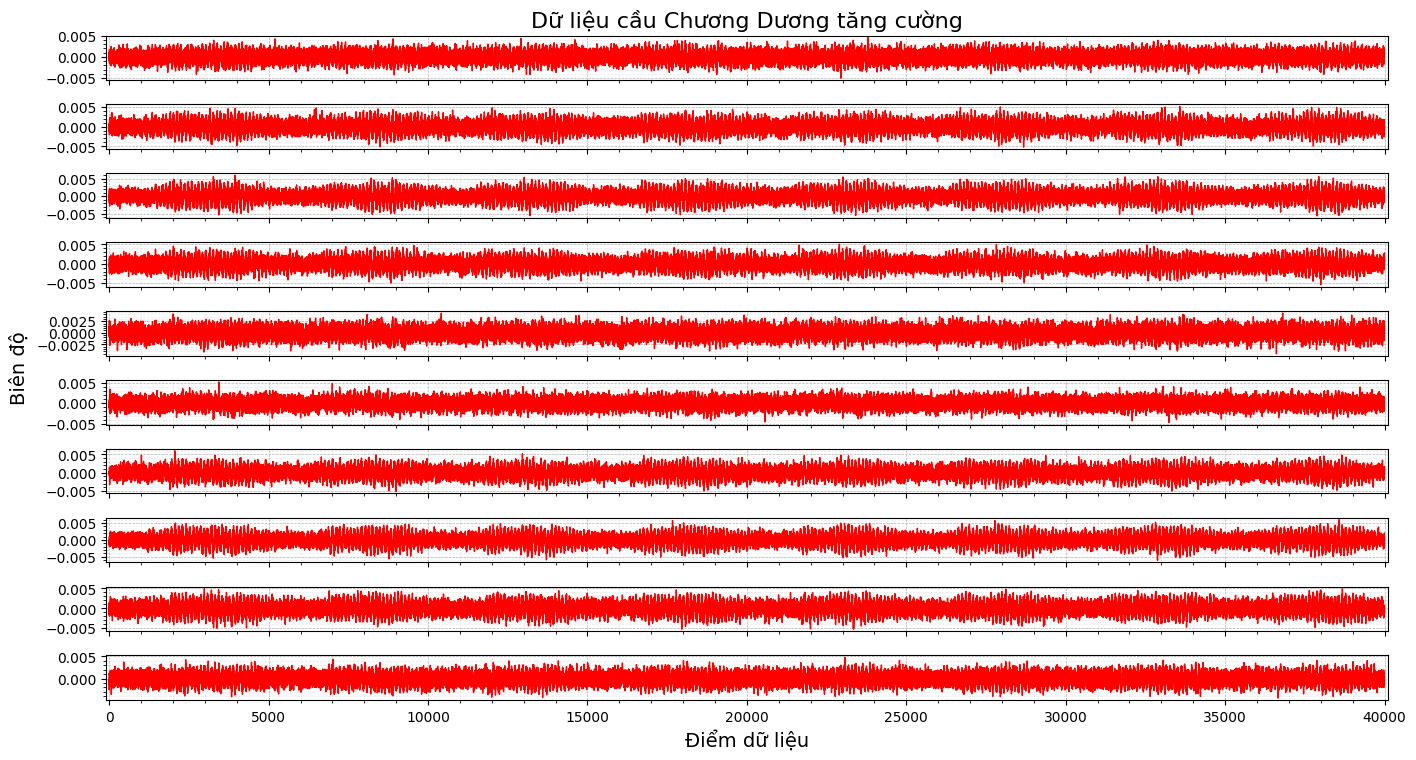

In [60]:
# Select the data at index (1, 1, :) which has a shape of (50000,)
Data = augmented_data[18, :, :]
print(Data.shape)
# Create the plot
fig, axes = plt.subplots(input_data.shape[1]-30, 1, figsize=(15, 8), sharex=True)


plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['font.family'] = 'sans-serif'
#print(axes)
# Plot the data for each sub-array
for i, ax in enumerate(axes):
    ax.plot(Data[i, :], linewidth=1, color = 'r')
    # ax.set_title(f'Z24 Signal Data at Index (1, {i}, :)', fontsize=12)
    
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)
    ax.minorticks_on()
    ax.grid(True, which='minor', color='#999999', linestyle='--', alpha=0.2)
    ax.set_xlim(-100, Data.shape[1]+100)
# Set common labels using axes
axes[-1].set_xlabel('Điểm dữ liệu', fontsize=14)
axes[0].set_title('Dữ liệu cầu Chương Dương tăng cường', fontsize=16)

# Create a "super" axis for the common Y-label and make it invisible
super_ax = fig.add_subplot(111, frame_on=False)
plt.tick_params(labelcolor="none", bottom=False, left=False)
super_ax.set_ylabel("Biên độ", fontsize=14, labelpad=15)

# Move the super axis ylabel to avoid overlap with subplots
super_ax.yaxis.set_label_coords(-0.06,0.5)

# Adjust the layout so that plots do not overlap
plt.tight_layout()
plt.show()

In [61]:
import numpy as np

def reshape_time_series_data_v8(input_data, label_data, segments_per_new_sample, segment_length):
    """
    Reshape time series data and corresponding labels into a specified shape.

    :param input_data: Original time series data array.
    :param label_data: Corresponding labels for the data.
    :param segments_per_new_sample: Number of segments per new sample.
    :param segment_length: Length of each segment.

    :return: Reshaped data array and corresponding labels.
    """
    num_samples_original, num_channels, length_original = input_data.shape

    # Validate the feasibility of reshaping
    if length_original % segment_length != 0:
        raise ValueError("Segment length must evenly divide the original length.")

    total_segments_per_original_sample = (length_original // segment_length) * num_channels
    num_samples_new = (num_samples_original * total_segments_per_original_sample) // segments_per_new_sample

    # Validate if reshaping is possible
    if (num_samples_original * total_segments_per_original_sample) % segments_per_new_sample != 0:
        raise ValueError("Reshaping not possible with the given dimensions.")

    # Initialize reshaped data and labels
    new_shape = (num_samples_new, segments_per_new_sample, segment_length)
    reshaped_data = np.zeros(new_shape)
    reshaped_labels = np.zeros(num_samples_new)

    # Reshape the data and labels
    count = 0
    for i in range(num_samples_original):
        segment_count = 0
        for j in range(num_channels):
            for k in range(length_original // segment_length):
                start_idx = k * segment_length
                end_idx = start_idx + segment_length
                reshaped_data[count, segment_count % segments_per_new_sample, :] = input_data[i, j, start_idx:end_idx]
                if (segment_count + 1) % segments_per_new_sample == 0:
                    reshaped_labels[count] = label_data[i]  # Assign corresponding label
                    count += 1
                segment_count += 1

    return reshaped_data, reshaped_labels

# Example usage
segments_per_new_sample = 8
segment_length = 5000

# Assume 'augmented_data' and 'augmented_labels' are your input data and labels
reshaped_data, reshaped_labels = reshape_time_series_data_v8(augmented_data, augmented_labels, segments_per_new_sample, segment_length)
print(reshaped_data.shape, reshaped_labels.shape)


(2200, 8, 5000) (2200,)


(8, 5000)


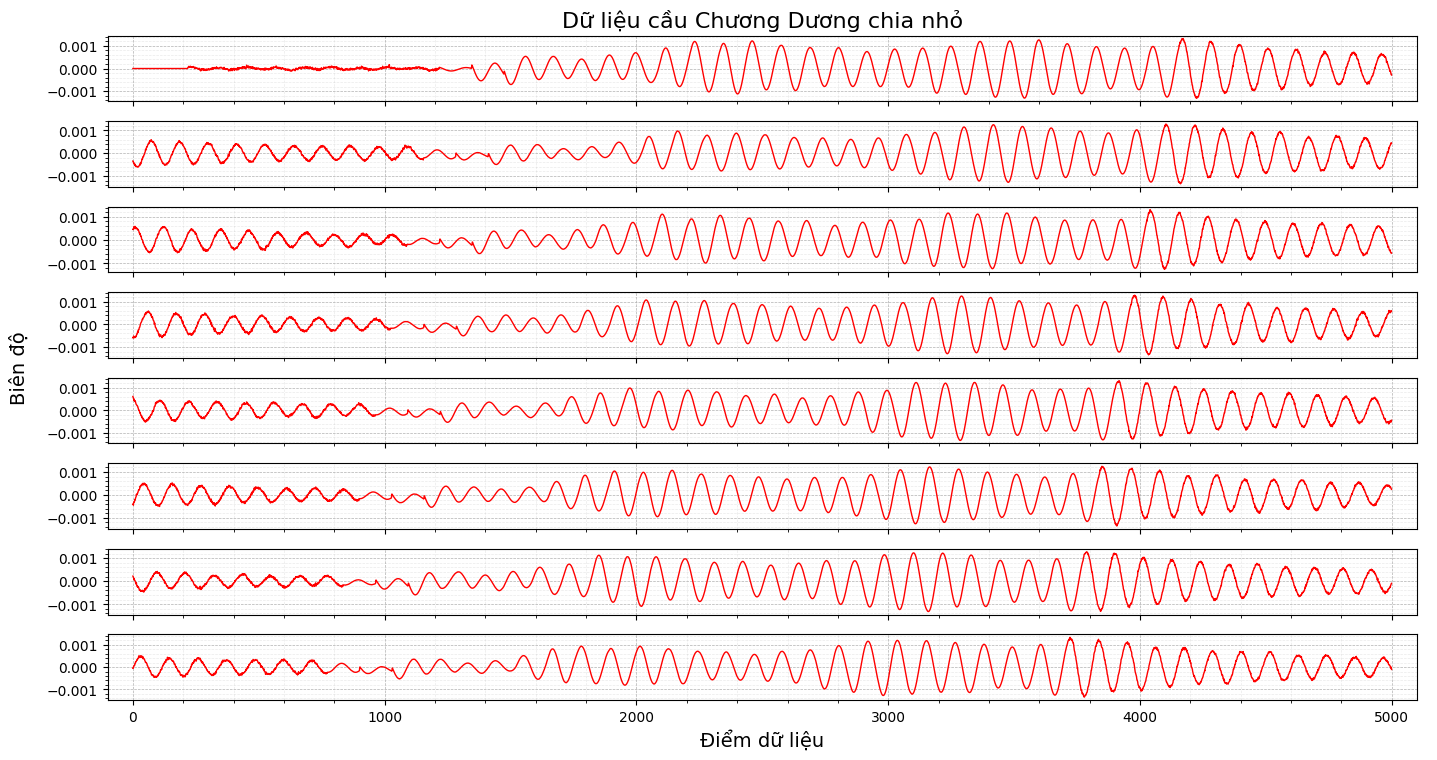

In [62]:

# Select the data at index (1, 1, :) which has a shape of (8000,)
Data = reshaped_data[200, :, :] #150 -> 200
print(Data.shape)
# Create the plot
fig, axes = plt.subplots(reshaped_data.shape[1], 1, figsize=(15, 8), sharex=True)

plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['font.family'] = 'sans-serif'

# Plot the data for each sub-array
for i, ax in enumerate(axes):
    ax.plot(Data[i, :], linewidth=1, color = 'r')
    # ax.set_title(f'Z24 Signal Data at Index (1, {i}, :)', fontsize=12)
    
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)
    ax.minorticks_on()
    ax.grid(True, which='minor', color='#999999', linestyle='--', alpha=0.2)
    ax.set_xlim(-100, Data.shape[1]+100)
# Set common labels using axes
axes[-1].set_xlabel('Điểm dữ liệu', fontsize=14)
axes[0].set_title('Dữ liệu cầu Chương Dương chia nhỏ', fontsize=16)

# Create a "super" axis for the common Y-label and make it invisible
super_ax = fig.add_subplot(111, frame_on=False)
plt.tick_params(labelcolor="none", bottom=False, left=False)
super_ax.set_ylabel("Biên độ", fontsize=14, labelpad=15)

# Move the super axis ylabel to avoid overlap with subplots
super_ax.yaxis.set_label_coords(-0.06,0.5)

# Adjust the layout so that plots do not overlap
plt.tight_layout()
plt.show()

In [63]:

# input_train = reshaped_data
# output_train = reshaped_labels
# XXX_train, XXX_valid, y_train, y_valid = train_test_split(input_train, output_train, test_size=0.4, random_state=42)


# Assuming reshaped_data and reshaped_labels are defined
input_train = reshaped_data  # Original shape is (924, 10, 5000)
output_train = reshaped_labels

# Split the data into training and validation sets
XXX_train_reshaped, XXX_valid_reshaped, y_train, y_valid = train_test_split(input_train, output_train, test_size=0.2, random_state=42)

# Now, reshape XXX_train and XXX_valid from (N, 10, 5000) to (N, 5000, 10)
XXX_train = XXX_train_reshaped.reshape(XXX_train_reshaped.shape[0], 5000, 8)
XXX_valid = XXX_valid_reshaped.reshape(XXX_valid_reshaped.shape[0], 5000, 8)

# Print the shapes to verify
print(XXX_train.shape)
print(XXX_valid.shape)


(1760, 5000, 8)
(440, 5000, 8)


In [64]:

# %%
XXX_train = np.reshape(XXX_train, (XXX_train.shape[0], XXX_train.shape[2], XXX_train.shape[1]))
XXX_valid = np.reshape(XXX_valid, (XXX_valid.shape[0], XXX_valid.shape[2], XXX_valid.shape[1]))
label=np.unique(y_train)
print(XXX_train.shape)
print(XXX_valid.shape)

(1760, 8, 5000)
(440, 8, 5000)


In [65]:
# Định dạng lại dữ liệu từ (samples, 8, 5000) thành (samples, 5000, 8)
XXX_train = np.transpose(XXX_train, (0, 2, 1))  # Từ (1760, 8, 5000) thành (1760, 5000, 8)
XXX_valid = np.transpose(XXX_valid, (0, 2, 1))  # Từ (440, 8, 5000) thành (440, 5000, 8)

In [66]:
# Kiểm tra kích thước dữ liệu
print("Shape of XXX_train:", XXX_train.shape)
print("Shape of XXX_valid:", XXX_valid.shape)

Shape of XXX_train: (1760, 5000, 8)
Shape of XXX_valid: (440, 5000, 8)


<h2><b>CNN_LSTM Model</b></h2>

In [67]:
import numpy as np
from keras.models import Sequential
from keras.layers import Convolution1D, MaxPooling1D, LSTM, Dropout, Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger
from keras.optimizers import Adam

In [68]:
# Tạo thư mục logs/cnn_lstm nếu chưa tồn tại
os.makedirs("logs/cnn_lstm", exist_ok=True)

In [69]:
# Tham số cấu hình
timesteps = 5000  # Số bước thời gian
features = 8      # Số đặc trưng mỗi bước thời gian
lstm_output_size = 128  # Kích thước đầu ra của LSTM
num_classes = 2   # Giả định phân loại nhị phân, điều chỉnh nếu cần
batch_size = 32   # Kích thước batch
epochs = 50       # Số epoch huấn luyện

In [70]:
# Xây dựng mô hình CNN-LSTM
cnn_lstm = Sequential()

# Tầng Convolution1D đầu tiên
cnn_lstm.add(Convolution1D(filters=64, kernel_size=5, padding="same", activation="relu", input_shape=(timesteps, features)))

# Tầng MaxPooling1D đầu tiên
cnn_lstm.add(MaxPooling1D(pool_size=2))

# Tầng Convolution1D thứ hai
cnn_lstm.add(Convolution1D(filters=32, kernel_size=5, padding="same", activation="relu"))

# Tầng MaxPooling1D thứ hai
cnn_lstm.add(MaxPooling1D(pool_size=2))

# Tầng Convolution1D thứ ba
cnn_lstm.add(Convolution1D(filters=16, kernel_size=5, padding="same", activation="relu"))

# Tầng MaxPooling1D thứ ba
cnn_lstm.add(MaxPooling1D(pool_size=2))

# Tầng LSTM
cnn_lstm.add(LSTM(units=lstm_output_size, return_sequences=False))

# Tầng Dropout
cnn_lstm.add(Dropout(0.3))

# Tầng Dense (đầu ra)
if num_classes == 2:
    cnn_lstm.add(Dense(1, activation="sigmoid"))
    loss_function = "binary_crossentropy"
else:
    cnn_lstm.add(Dense(num_classes, activation="softmax"))
    loss_function = "categorical_crossentropy"

In [71]:
# Cấu hình optimizer
optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-8)

# Biên dịch mô hình
cnn_lstm.compile(loss=loss_function, optimizer=optimizer, metrics=["accuracy"])

# Thiết lập callbacks
checkpointer = ModelCheckpoint(filepath="logs/cnn_lstm/checkpoint-{epoch:02d}.keras", 
                              monitor="val_accuracy", 
                              save_best_only=True, 
                              mode="max", 
                              verbose=1)

early_stopping = EarlyStopping(monitor="val_loss", 
                              patience=10, 
                              restore_best_weights=True, 
                              verbose=1)

reduce_lr = ReduceLROnPlateau(monitor="val_loss", 
                             factor=0.5, 
                             patience=5, 
                             min_lr=1e-6, 
                             verbose=1)

csv_logger = CSVLogger("logs/cnn_lstm/training_log.csv", separator=",", append=False)

In [72]:
# Huấn luyện mô hình
history = cnn_lstm.fit(XXX_train, y_train, 
                      batch_size=batch_size, 
                      epochs=epochs, 
                      validation_data=(XXX_valid, y_valid), 
                      callbacks=[checkpointer, early_stopping, reduce_lr, csv_logger],
                      verbose=1)

# Đánh giá mô hình
loss, accuracy = cnn_lstm.evaluate(XXX_valid, y_valid, verbose=0)
print(f"\nValidation Loss: {loss:.4f}, Validation Accuracy: {accuracy*100:.2f}%")

# Lưu mô hình cuối cùng
cnn_lstm.save("logs/cnn_lstm/final_model.keras")

# In tóm tắt mô hình
cnn_lstm.summary()

Epoch 1/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step - accuracy: 0.0865 - loss: -25.3516
Epoch 1: val_accuracy improved from -inf to 0.10455, saving model to logs/cnn_lstm/checkpoint-01.keras
55/55 ━━━━━━━━━━━━━━━━━━━━ 17s 292ms/step - accuracy: 0.0866 - loss: -25.7800 - val_accuracy: 0.1045 - val_loss: -78.6962 - learning_rate: 0.0010
Epoch 2/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step - accuracy: 0.0923 - loss: -89.7009
Epoch 2: val_accuracy did not improve from 0.10455
55/55 ━━━━━━━━━━━━━━━━━━━━ 19s 352ms/step - accuracy: 0.0922 - loss: -89.8340 - val_accuracy: 0.1045 - val_loss: -109.8195 - learning_rate: 0.0010
Epoch 3/50
46/55 ━━━━━━━━━━━━━━━━━━━━ 2s 260ms/step - accuracy: 0.0736 - loss: -120.0794

KeyboardInterrupt: 

<h2><b>Train</b></h2>